In [40]:
%matplotlib inline

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split 

In [41]:
labels = {"成熟": 0, "陰沈": 1, "搞怪": 2, "清純可愛": 3, "知性": 4, "陽光開朗": 5, "性感": 6, "老實": 7}
train_x = []
train_y = []
length = []


for i in labels.keys():
    path = f"/Volumes/FUJITSU/{i}" 
    files= os.listdir(path)
    length.append(len(files))
    print(f"{i}: {len(files)}")
    for file in files:
        if not os.path.isdir(file) and "._" not in file:
            img = load_img(f"{path}/{file}")
            train_x.append(img_to_array(img))
            train_y.append(labels[i])
train_x = np.array(train_x)
train_y = np.array(train_y)

成熟: 471
陰沈: 152
搞怪: 189
清純可愛: 323
知性: 329
陽光開朗: 278
性感: 418
老實: 203


Text(0.5,1,'Picture Classification')

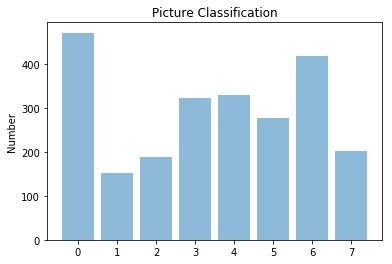

In [42]:
objects = np.arange(8)
y_pos = np.arange(len(objects))

plt.bar(y_pos, length, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title("Picture Classification")

In [43]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=29)

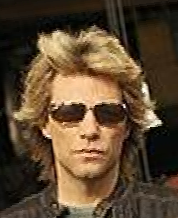

In [44]:
array_to_img(train_x[1000])

In [45]:
from keras.utils import np_utils # one-hot encoding

train_y = np_utils.to_categorical(train_y, 8)
test_y = np_utils.to_categorical(test_y, 8)
train_x = train_x / 255
test_x = test_x / 255

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import metrics
# when the loss doesn't change, it will stop training 
from keras.callbacks import EarlyStopping

In [90]:
face_cf = Sequential()
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [91]:
# conv --> maxpool --> conv --> maxpool --> conv --> maxpool
face_cf.add(Conv2D(2, (7, 7), padding="same", input_shape=(218, 178, 3), activation="relu"))
face_cf.add(MaxPool2D(pool_size=(3,3)))
face_cf.add(Conv2D(16, (7, 7), padding="same", activation="relu"))
face_cf.add(MaxPool2D(pool_size=(3,3)))
face_cf.add(Conv2D(32, (7, 7), padding="same", activation="relu"))
face_cf.add(MaxPool2D(pool_size=(3,3)))

face_cf.add(Flatten())
face_cf.add(Dense(10, activation="relu"))
face_cf.add(Dense(20, activation="relu"))
face_cf.add(Dense(40, activation="relu"))
face_cf.add(Dense(8, activation="softmax"))

In [92]:
face_cf.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 218, 178, 2)       296       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 72, 59, 2)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 59, 16)        1584      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 24, 19, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 19, 32)        25120     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 6, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1536)             

In [93]:
face_cf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.categorical_accuracy])

In [94]:
face_cf.fit(train_x, train_y, batch_size=100, epochs=15)

Epoch 1/15
1889/1889 [==============================] - 70s 37ms/step - loss: 2.0709 - categorical_accuracy: 0.1747
Epoch 2/15
1889/1889 [==============================] - 68s 36ms/step - loss: 2.0413 - categorical_accuracy: 0.1964
Epoch 3/15
1889/1889 [==============================] - 71s 38ms/step - loss: 2.0233 - categorical_accuracy: 0.1927
Epoch 4/15
1889/1889 [==============================] - 70s 37ms/step - loss: 2.0236 - categorical_accuracy: 0.1885
Epoch 5/15
1889/1889 [==============================] - 71s 37ms/step - loss: 2.0231 - categorical_accuracy: 0.1964
Epoch 6/15
1889/1889 [==============================] - 74s 39ms/step - loss: 2.0238 - categorical_accuracy: 0.1969
Epoch 7/15
1889/1889 [==============================] - 61s 32ms/step - loss: 2.0162 - categorical_accuracy: 0.2017
Epoch 8/15
1889/1889 [==============================] - 59s 31ms/step - loss: 2.0158 - categorical_accuracy: 0.1969
Epoch 9/15
1889/1889 [==============================] - 60s 32ms/step - 

In [97]:
score = face_cf.evaluate(test_x, test_y)

473/473 [==============================] - 4s 8ms/step


In [98]:
print(f"loss: {score[0]}")
print(f"accuracy: {score[1]*100}%")

loss: 1.968547221722109
accuracy: 24.10147935152054%
